<a href="https://colab.research.google.com/github/HazemmoAlsady/AWN_Graduation_Project/blob/main/chatbot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install scikit-learn joblib


In [13]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import pandas as pd
import joblib


In [6]:
chatbot_data = {
    "text": [
        "السلام عليكم",
        "أهلاً",
        "مساء الخير",

        "عايز مساعدة",
        "محتاج دعم",
        "أقدم طلب إزاي",

        "إيه الأوراق المطلوبة",
        "الأوراق المطلوبة إيه",

        "هل أنا مستحق",
        "هل أستحق الدعم",

        "ليه الطلب High",
        "يعني إيه درجة الاحتياج",

        "يعني إيه مساعدة غذائية",
        "نوع المساعدة إيه",

        "أتابع طلبي إزاي",
        "حالة الطلب",

        "شكرا",
        "تسلم"
    ],
    "intent": [
        "greeting","greeting","greeting",
        "ask_for_help","ask_for_help","ask_for_help",
        "required_documents","required_documents",
        "eligibility","eligibility",
        "explain_need_level","explain_need_level",
        "explain_assistance_type","explain_assistance_type",
        "track_request","track_request",
        "thanks","thanks"
    ]
}

df_chatbot = pd.DataFrame(chatbot_data)
df_chatbot.head()


,text,intent
0,السلام عليكم,greeting
1,أهلاً,greeting
2,مساء الخير,greeting
3,عايز مساعدة,ask_for_help
4,محتاج دعم,ask_for_help


In [8]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

intent_model = Pipeline([
    ("tfidf", TfidfVectorizer(ngram_range=(1,2))),
    ("clf", LogisticRegression(max_iter=1000))
])

intent_model.fit(df_chatbot["text"], df_chatbot["intent"])


Pipeline(steps=[('tfidf', TfidfVectorizer(ngram_range=(1, 2))),
                ('clf', LogisticRegression(max_iter=1000))])

In [9]:
responses = {
    "greeting": "أهلاً بيك 👋، إزاي أقدر أساعدك؟",

    "ask_for_help": (
        "من فضلك سجّل بيانات الأسرة، "
        "وسيتم تحليل الطلب تلقائيًا لتحديد نوع المساعدة ودرجة الاحتياج."
    ),

    "required_documents": (
        "الأوراق المطلوبة: صورة البطاقة، بحث اجتماعي، "
        "وإثبات دخل إن وجد."
    ),

    "eligibility": (
        "يتم تحديد الاستحقاق بناءً على الدخل، المصروفات، "
        "عدد أفراد الأسرة، والديون."
    ),

    "explain_need_level": (
        "درجة الاحتياج (High / Medium / Low) "
        "يتم تحديدها باستخدام نموذج ذكاء اصطناعي يحلل الوضع الاقتصادي للأسرة."
    ),

    "explain_assistance_type": (
        "نوع المساعدة (غذائية، علاجية، تعليمية...) "
        "يتم تحديده بناءً على وصف الطلب والبيانات المدخلة."
    ),

    "track_request": (
        "يمكنك متابعة حالة الطلب من خلال رقم الطلب "
        "أو التواصل مع الجمعية المسؤولة."
    ),

    "thanks": "تحت أمرك في أي وقت 🌸",

    "unknown": "ممكن توضّح سؤالك أكتر علشان أقدر أساعدك؟"
}


In [10]:
def chatbot_reply(user_text):
    intent = intent_model.predict([user_text])[0]
    return responses.get(intent, responses["unknown"])


In [11]:
samples = [
    "السلام عليكم",
    "عايز مساعدة",
    "ليه الطلب High؟",
    "إيه الأوراق المطلوبة؟",
    "شكرا"
]

for s in samples:
    print("User:", s)
    print("Bot :", chatbot_reply(s))
    print("-" * 40)


User: السلام عليكم
Bot : أهلاً بيك 👋، إزاي أقدر أساعدك؟
----------------------------------------
User: عايز مساعدة
Bot : من فضلك سجّل بيانات الأسرة، وسيتم تحليل الطلب تلقائيًا لتحديد نوع المساعدة ودرجة الاحتياج.
----------------------------------------
User: ليه الطلب High؟
Bot : درجة الاحتياج (High / Medium / Low) يتم تحديدها باستخدام نموذج ذكاء اصطناعي يحلل الوضع الاقتصادي للأسرة.
----------------------------------------
User: إيه الأوراق المطلوبة؟
Bot : الأوراق المطلوبة: صورة البطاقة، بحث اجتماعي، وإثبات دخل إن وجد.
----------------------------------------
User: شكرا
Bot : تحت أمرك في أي وقت 🌸
----------------------------------------


In [14]:
joblib.dump(intent_model, "/content/drive/MyDrive/graduation_project/chatbot_intent_model.pkl")
print("Chatbot model saved ✅")


Chatbot model saved ✅


# **OCR**

In [22]:
!pip install easyocr opencv-python pillow matplotlib


In [31]:
from google.colab import files

uploaded = files.upload()
image_path = list(uploaded.keys())[0]


Saving البطاقه.png to البطاقه (2).png


(np.float64(-0.5), np.float64(281.5), np.float64(176.5), np.float64(-0.5))

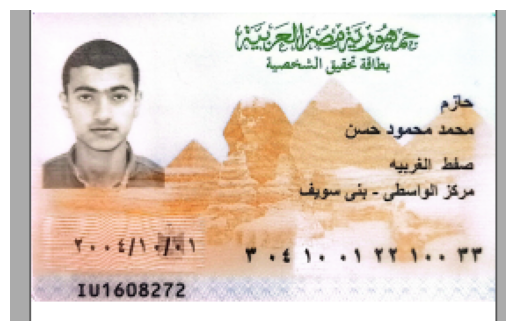

In [32]:
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open(image_path)
plt.imshow(img)
plt.axis("off")


(np.float64(-0.5), np.float64(281.5), np.float64(176.5), np.float64(-0.5))

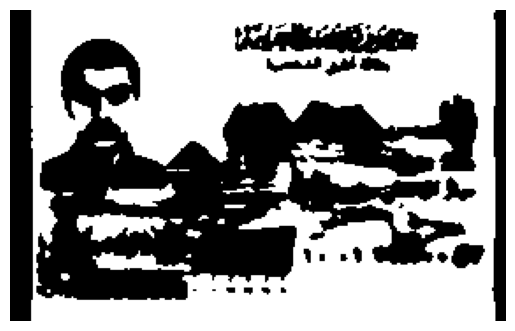

In [33]:
import cv2
import numpy as np

def preprocess_image(image_path):
    img = cv2.imread(image_path)

    # تحويل لـ grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # تحسين التباين
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    gray = clahe.apply(gray)

    # تقليل النويز
    blur = cv2.GaussianBlur(gray, (5,5), 0)

    # Threshold
    _, thresh = cv2.threshold(
        blur, 0, 255,
        cv2.THRESH_BINARY + cv2.THRESH_OTSU
    )

    return thresh

processed_img = preprocess_image(image_path)
cv2.imwrite("processed.png", processed_img)

plt.imshow(processed_img, cmap="gray")
plt.axis("off")


In [34]:
import easyocr

reader = easyocr.Reader(
    ['ar'],
    gpu=False,
    verbose=False
)

results = reader.readtext("processed.png", detail=1)


In [35]:
extracted_text = []
confidences = []

for box, text, conf in results:
    extracted_text.append(text)
    confidences.append(conf)

raw_text = " ".join(extracted_text)
avg_confidence = sum(confidences) / len(confidences) if confidences else 0

print("RAW OCR TEXT:\n", raw_text)
print("\nAVERAGE CONFIDENCE:", round(avg_confidence, 2))


RAW OCR TEXT:
 

AVERAGE CONFIDENCE: 0


In [36]:
def normalize_arabic_numbers(text):
    arabic_nums = "٠١٢٣٤٥٦٧٨٩"
    english_nums = "0123456789"
    for a, e in zip(arabic_nums, english_nums):
        text = text.replace(a, e)
    return text

clean_text = normalize_arabic_numbers(raw_text)
print("\nCLEAN TEXT:\n", clean_text)



CLEAN TEXT:
 


In [37]:
import re

def extract_id_data(text):
    data = {}

    # الرقم القومي (يبدأ بـ 2 أو 3)
    national_id = re.search(r"\b[23]\d{13}\b", text)
    if national_id:
        data["national_id"] = national_id.group()

        # استخراج سنة الميلاد من الرقم القومي
        year_prefix = "19" if national_id.group()[0] == "2" else "20"
        data["birth_year"] = year_prefix + national_id.group()[1:3]

    # المحافظة (أمثلة)
    govs = [
        "القاهرة","الجيزة","بني سويف","الفيوم","المنيا",
        "اسيوط","سوهاج","قنا","اسوان","الدقهلية"
    ]
    for gov in govs:
        if gov in text:
            data["governorate"] = gov
            break

    return data


In [38]:
extracted_data = extract_id_data(clean_text)

final_output = {
    "ocr_text": clean_text,
    "extracted_data": extracted_data,
    "ocr_confidence": round(avg_confidence, 2),
    "source": "OCR"
}

print("\nFINAL OUTPUT:\n")
print(final_output)



FINAL OUTPUT:

{'ocr_text': '', 'extracted_data': {}, 'ocr_confidence': 0, 'source': 'OCR'}
